In [1]:
# Importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pickle

In [2]:
# Loading the dataset in csv format

df = pd.read_csv('./garments_worker_productivity.csv')
print(df.head())
print(df.columns)

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [3]:
# Correlation analysis 

print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   f


 Correlation Matrix:
                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.122089  0.131147   

                       over_time  incenti

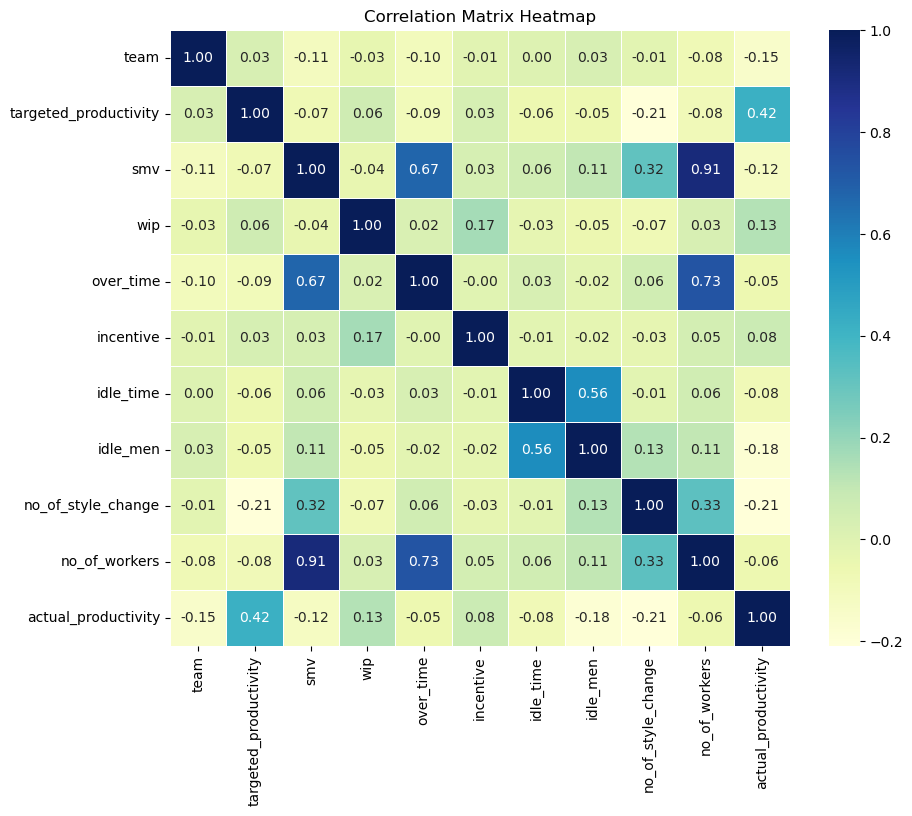

In [4]:
# Generate the correlation matrix
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Show the correlation matrix as a table
print("\n Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [5]:
# Descriptive analysis

print("\n Data Info:")
print(df.info())


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   floa

In [6]:
# Descriptive statistics for continuous features
print("\n Descriptive Statistics for Numerical Features:")
print(df.describe(include=[float, int]))

# Descriptive analysis for categorical features
print("\n Descriptive Statistics for Categorical Features:")
print(df.describe(include=[object]))


 Descriptive Statistics for Numerical Features:
              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.00

In [7]:
# Checking for null values
print(" Missing values per column:\n", df.isnull().sum())

# Check dataset shape and info before cleaning
print("\n Shape before dropping columns:", df.shape)
print("\n Dataset Info:")
df.info()

#  Drop columns with >20% missing values
missing_thresh = len(df) * 0.8
df = df.dropna(axis=1, thresh=missing_thresh)
print("\n Shape after dropping sparse columns:", df.shape)

# Fill remaining missing values
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].mean())

# Final check
print("\n Missing values after filling:\n", df.isnull().sum())


 Missing values per column:
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

 Shape before dropping columns: (1197, 15)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   

In [8]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

#  Extract month as an integer and store in new column 'month'
df['month'] = df['date'].dt.month

#  Drop the original 'date' column (no longer needed)
df.drop('date', axis=1, inplace=True)

#  Preview the dataset and updated column names
print(" First few rows:\n", df.head())
print("\n Columns after processing:", df.columns.tolist())


 First few rows:
     quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0             0.886500   

In [9]:
# Handling Categorical Values
# Define the categorical columns to encode

categorical_cols = ['quarter', 'department', 'day']

# Create a dictionary to store encoders if needed later 
encoders = {}

# Apply Label Encoding for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    

# Display a sample of the encoded dataset
print("\nEncoded Data Preview:\n", df.head())

# Check updated datatypes after encoding
print("\nData types after encoding:\n", df.dtypes)



Encoded Data Preview:
    quarter  department  day  team  targeted_productivity    smv  over_time  \
0        0           2    3     8                   0.80  26.16       7080   
1        0           1    3     1                   0.75   3.94        960   
2        0           2    3    11                   0.80  11.41       3660   
3        0           2    3    12                   0.80  11.41       3660   
4        0           2    3     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  month  
0             0.940725      1  
1         

In [10]:
#  Define feature matrix X and target vector y
target_col = 'actual_productivity'
X = df.drop(columns=[target_col])
y = df[target_col]

#  Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Print dataset metadata
print(" Feature Columns:\n", X.columns.tolist())
print(" Number of Features:", X.shape[1])
print("\n Training Set Shape:", X_train.shape)
print(" Testing Set Shape:", X_test.shape)

 Feature Columns:
 ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month']
 Number of Features: 13

 Training Set Shape: (957, 13)
 Testing Set Shape: (240, 13)


In [11]:
# Traning a Model
#  Helper function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

#  Train Linear Regression
model_lr = LinearRegression()
pred_lr = evaluate_model("Linear Regression", model_lr, X_train, y_train, X_test, y_test)

#  Train Random Forest
model_rf = RandomForestRegressor(random_state=42)
pred_rf = evaluate_model("Random Forest", model_rf, X_train, y_train, X_test, y_test)

#  Train XGBoost 
model_xgb = XGBRegressor(random_state=42)
pred_xgb = evaluate_model("XGBoost", model_xgb, X_train, y_train, X_test, y_test)

# Summary Table 
models = ['Linear Regression', 'Random Forest', 'XGBoost']
preds = [pred_lr, pred_rf, pred_xgb]

print("\n Model Comparison Summary:")
for name, pred_vals in zip(models, preds):
    print(f"\n--- {name} ---")
    print(f"MAE: {mean_absolute_error(y_test, pred_vals):.4f}")
    print(f"MSE: {mean_squared_error(y_test, pred_vals):.4f}")
    print(f"R2 Score: {r2_score(y_test, pred_vals):.4f}")


 Model Comparison Summary:

--- Linear Regression ---
MAE: 0.1075
MSE: 0.0216
R2 Score: 0.1862

--- Random Forest ---
MAE: 0.0669
MSE: 0.0117
R2 Score: 0.5583

--- XGBoost ---
MAE: 0.0727
MSE: 0.0151
R2 Score: 0.4331


In [12]:
# Compare R2 scores for each model &  Select Best Model

r2_scores = {
    'Linear Regression': r2_score(y_test, pred_lr),
    'Random Forest':     r2_score(y_test, pred_rf),
    'XGBoost':           r2_score(y_test, pred_xgb )
}

models = {
    'Linear Regression': model_lr,
    'Random Forest':     model_rf,
    'XGBoost':           model_xgb
}

#  Select the best model based on R2
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = models[best_model_name]
best_r2 = r2_scores[best_model_name]

#  Display best model and its score
print(f"\n Best Model: {best_model_name}")
print(f" R2 Score: {best_r2:.4f}")


 Best Model: Random Forest
 R2 Score: 0.5583


In [13]:
#  Save the best model using pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    print(" Model saved successfully as 'best_model.pkl'")

 Model saved successfully as 'best_model.pkl'
